In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import missingno as msno

In [173]:
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Global YouTube StatisticsATVD2.csv', encoding = 'ISO-8859-1')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Tratamento da base


Nesse contexto, removemos os valores acima de 60.000.000 (Outliers)

In [174]:
ytb_df = ["rank", "Youtuber", "subscribers", "video views", "uploads", "Country", "channel_type", "created_year"]
df = df.loc[:, ytb_df]

In [175]:
limite = 60_000_000

df = df.loc[df['subscribers'] <= limite]

In [176]:
df.dropna(inplace = True)

### Divisão 70%, 30%

In [177]:
df = df.sample(frac=1)

train_size = int(0.7 * len(df))

train_data = df.iloc[:train_size, :]
test_data = df.iloc[train_size:, :]

df_reconstruido = pd.concat([train_data, test_data])

print(df.equals(df_reconstruido))


True


In [178]:
train_data.head()

,rank,Youtuber,subscribers,video views,uploads,Country,channel_type,created_year
617,618,Volga Video,15700000,9.787698e+09,16874,India,Entertainment,2012.0
560,561,Jordan Matter,16600000,5.819509e+09,413,United States,Entertainment,2006.0
58,59,Katy Perry,44200000,2.545895e+10,128,United States,Music,2008.0
176,177,Enaldinho,29200000,1.162744e+10,3654,Brazil,Games,2012.0
237,238,The Lallantop,25200000,1.040935e+10,51129,India,News,2015.0


### Sample 1, 2, 3

In [179]:
sample_data1 = train_data.sample(frac= 0.30)
sample_data2 = train_data.sample(frac= 0.30)
sample_data3 = train_data.sample(frac= 0.30)

### Hipóteses estatísticas

### Teste de normalidade
Shapiro

Hipótese nula (H0) - Os dados parecem formar uma distribuição normal.

Hipótese alternativa (H0) - Os dados não parecem formar uma distribuição normal.

Nosso nivel de significancia testado será de 5% (0.05), que neste caso tambem é o padrão de alfa.



In [180]:
from scipy.stats import shapiro

data = sample_data1['subscribers'].dropna()
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.787, p=0.000
Provavelmente NÃO é uma Distribuição Normal


In [181]:
from scipy.stats import shapiro

data = sample_data2['subscribers'].dropna()
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.797, p=0.000
Provavelmente NÃO é uma Distribuição Normal


In [182]:
from scipy.stats import shapiro

data = sample_data3['subscribers'].dropna()
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.723, p=0.000
Provavelmente NÃO é uma Distribuição Normal


#### O Gráfico Q-Q

##### Normal

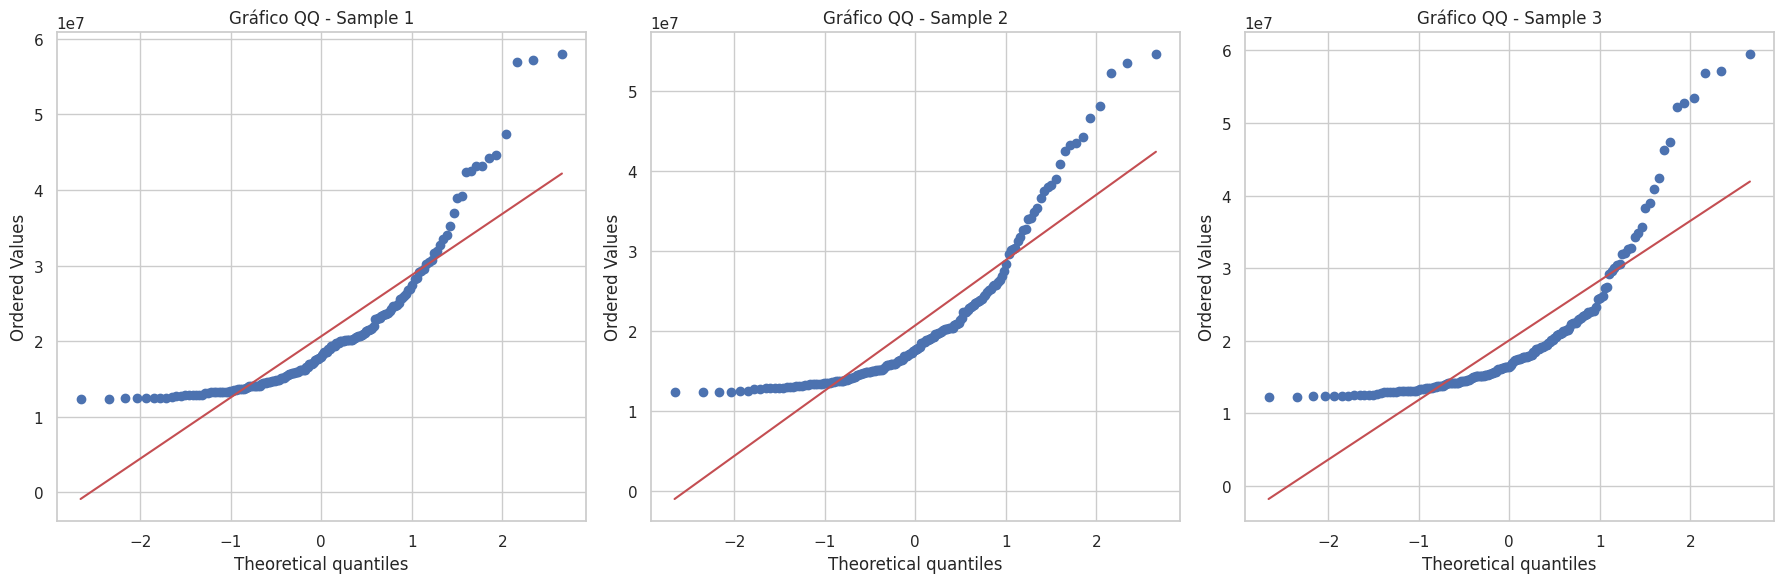

In [183]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, sample_data in enumerate([sample_data1, sample_data2, sample_data3]):
    stats.probplot(sample_data['subscribers'], dist="norm", plot=axes[i])
    axes[i].set_title(f"Gráfico QQ - Sample {i+1}")

plt.tight_layout()
plt.show()

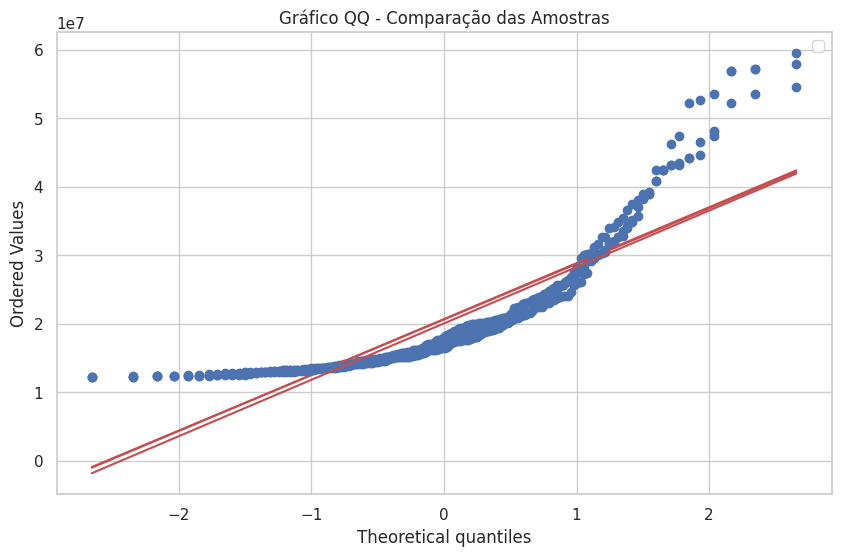

In [184]:
plt.figure(figsize=(10, 6))
stats.probplot(sample_data1['subscribers'], dist="norm", plot=plt)
stats.probplot(sample_data2['subscribers'], dist="norm", plot=plt)
stats.probplot(sample_data3['subscribers'], dist="norm", plot=plt)

plt.title("Gráfico QQ - Comparação das Amostras")
plt.legend()
plt.show()

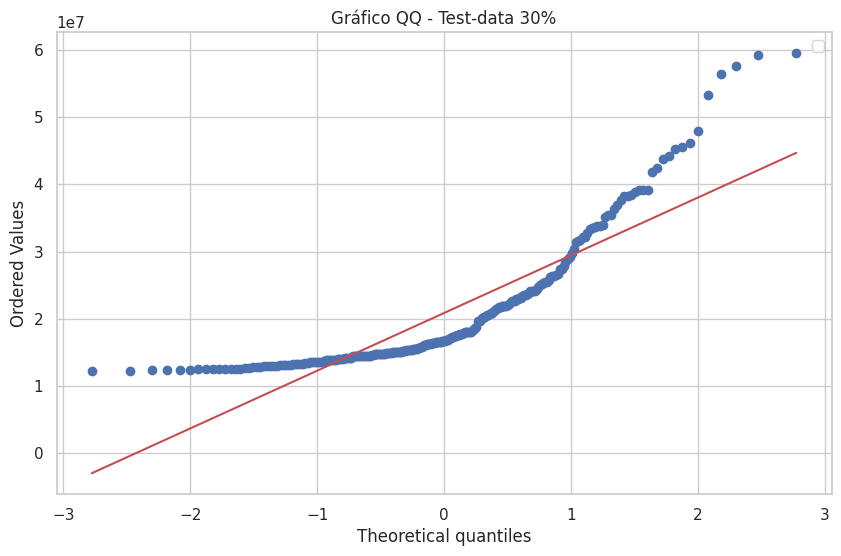

In [185]:
plt.figure(figsize=(10, 6))
stats.probplot(test_data['subscribers'], dist="norm", plot=plt)

plt.title("Gráfico QQ - Test-data 30%")
plt.legend()
plt.show()

##### Exponencial

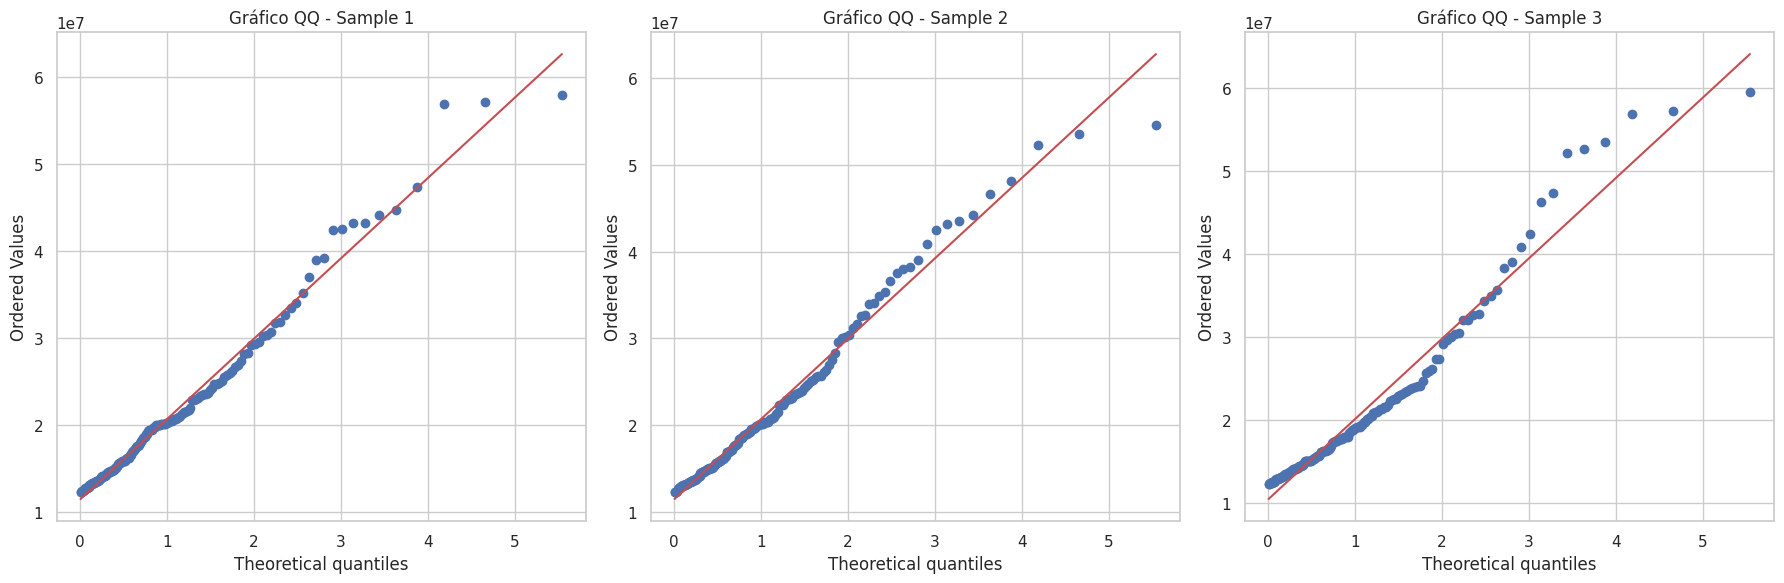

In [186]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, sample_data in enumerate([sample_data1, sample_data2, sample_data3]):
    stats.probplot(sample_data['subscribers'], dist="expon", plot=axes[i])
    axes[i].set_title(f"Gráfico QQ - Sample {i+1}")

plt.tight_layout()
plt.show()

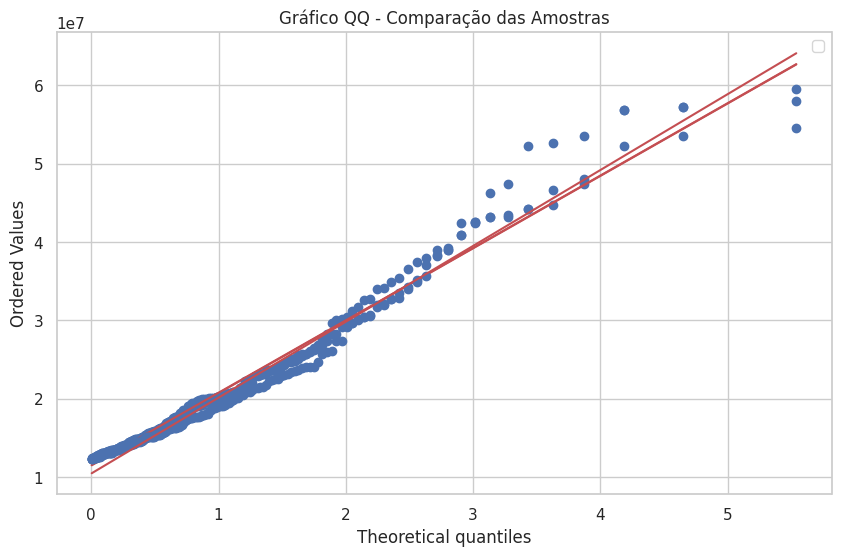

In [187]:
plt.figure(figsize=(10, 6))
stats.probplot(sample_data1['subscribers'], dist="expon", plot=plt)
stats.probplot(sample_data2['subscribers'], dist="expon", plot=plt)
stats.probplot(sample_data3['subscribers'], dist="expon", plot=plt)

plt.title("Gráfico QQ - Comparação das Amostras")
plt.legend()
plt.show()

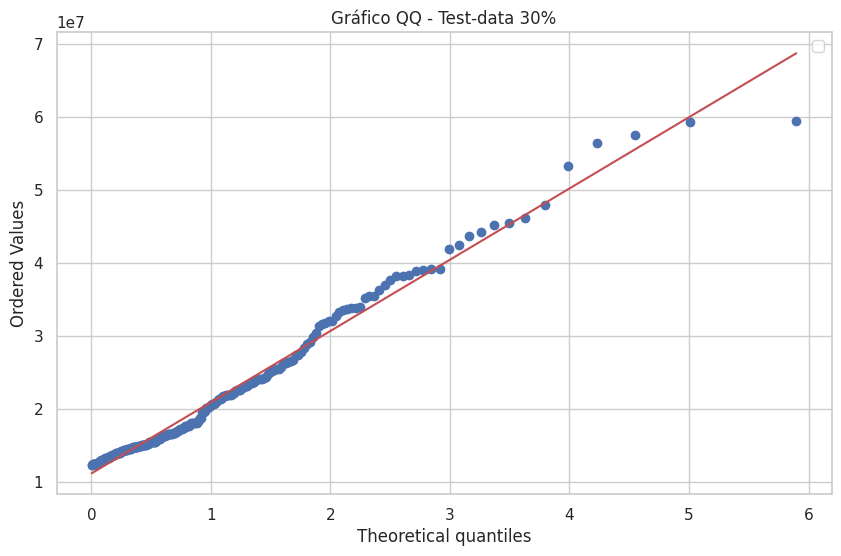

In [188]:
plt.figure(figsize=(10, 6))
stats.probplot(test_data['subscribers'], dist="expon", plot=plt)

plt.title("Gráfico QQ - Test-data 30%")
plt.legend()
plt.show()

### Teste de equidade de distribuição das amostras

Kolmogorov-Smirnov

Hipótese nula (H0) - As duas amostras têm a mesma distribuição.

Hipótese alternativa (H1) - As duas amostras NÃO têm a mesma distribuição.

Nosso nivel de significancia testado será de 5% (0.05), que neste caso tambem é o padrão de alfa.

In [189]:
from scipy import stats
amostra1 = sample_data1['subscribers'].dropna()
amostra2 = sample_data2['subscribers'].dropna()

statistic, p_value = stats.ks_2samp(amostra1, amostra2)

alpha = 0.05

if p_value < alpha:
    print(f"Rejeitamos a hipótese nula: As duas amostras não aparentam ter a mesma distribuição. P  = {p_value}")
else:
    print(f"Não rejeitamos a hipótese nula: As duas amostras aparentam ter a mesma distribuição. P  = {p_value}")


Não rejeitamos a hipótese nula: As duas amostras aparentam ter a mesma distribuição. P  = 0.9936378137969419


#### Gráfico de densidade

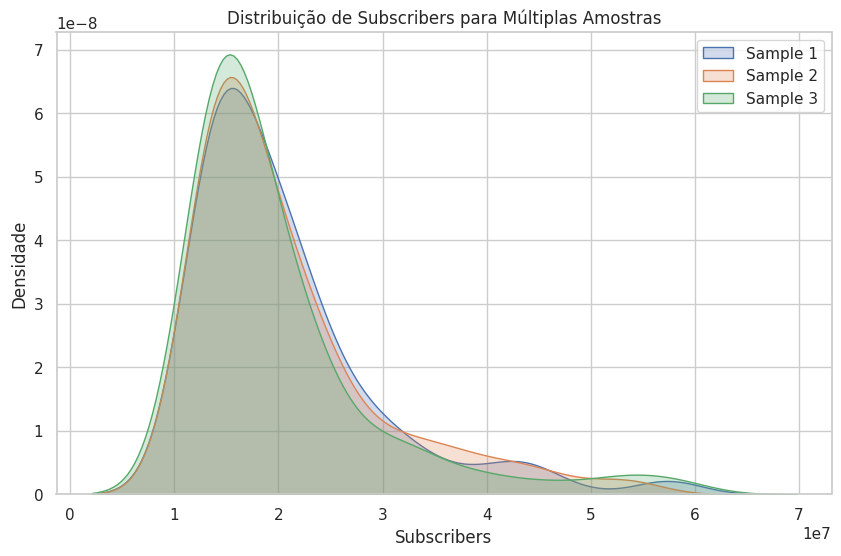

In [190]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(data=sample_data1['subscribers'], label='Sample 1', fill=True)
sns.kdeplot(data=sample_data2['subscribers'], label='Sample 2', fill=True)
sns.kdeplot(data=sample_data3['subscribers'], label='Sample 3', fill=True)

plt.title("Distribuição de Subscribers para Múltiplas Amostras")
plt.xlabel("Subscribers")
plt.ylabel("Densidade")
plt.legend()

plt.show()

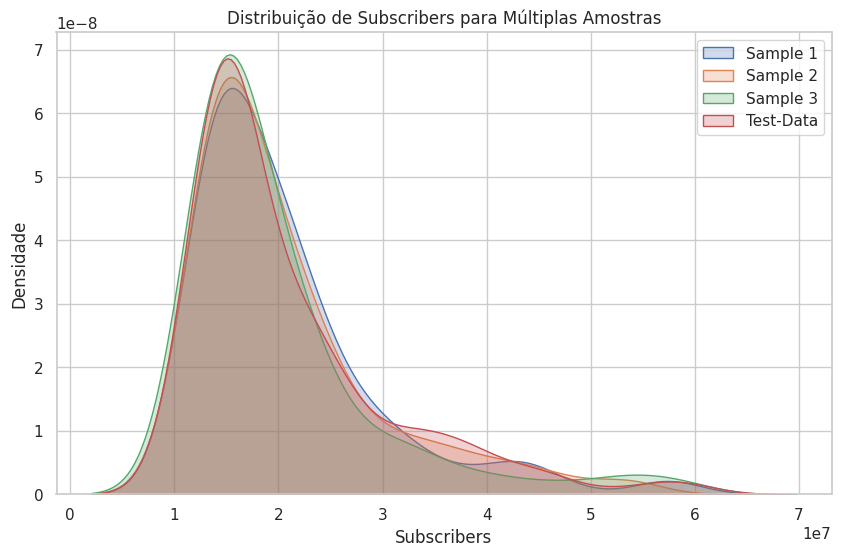

In [191]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(data=sample_data1['subscribers'], label='Sample 1', fill=True)
sns.kdeplot(data=sample_data2['subscribers'], label='Sample 2', fill=True)
sns.kdeplot(data=sample_data3['subscribers'], label='Sample 3', fill=True)
sns.kdeplot(data=test_data['subscribers'], label='Test-Data', fill=True)

plt.title("Distribuição de Subscribers para Múltiplas Amostras")
plt.xlabel("Subscribers")
plt.ylabel("Densidade")
plt.legend()

plt.show()

Cada valor numerico da camada de baixo (1e7) representa 10.000.000

#### Visualização da distribuição de inscritos pelo grafico de barra

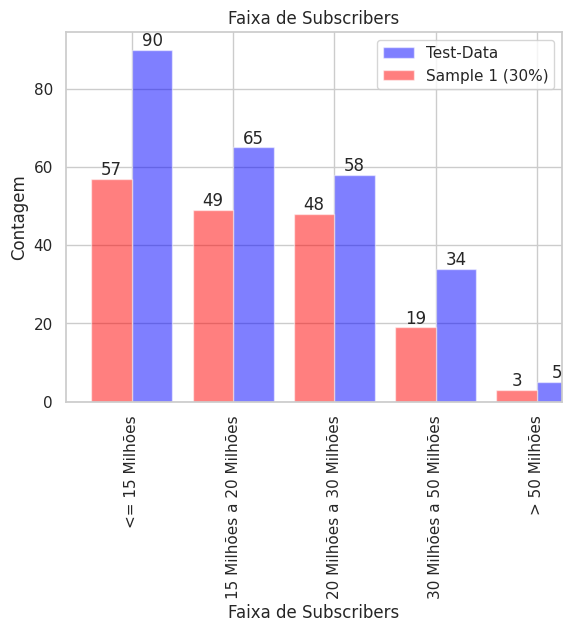

In [192]:
faixas_test_data = [
    (test_data['subscribers'] <= 15_000_000),
    (test_data['subscribers'] > 15_000_000) & (test_data['subscribers'] <= 20_000_000),
    (test_data['subscribers'] > 20_000_000) & (test_data['subscribers'] <= 30_000_000),
    (test_data['subscribers'] > 30_000_000) & (test_data['subscribers'] <= 50_000_000),
    (test_data['subscribers'] > 50_000_000)
]

contagens_test_data = [faixa.sum() for faixa in faixas_test_data]

rotulos_test_data = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_test_data = pd.DataFrame({'Faixa de Subscribers (test_data)': rotulos_test_data, 'Contagem (test_data)': contagens_test_data})

faixas_sample = [
    (sample_data1['subscribers'] <= 15_000_000),
    (sample_data1['subscribers'] > 15_000_000) & (sample_data1['subscribers'] <= 20_000_000),
    (sample_data1['subscribers'] > 20_000_000) & (sample_data1['subscribers'] <= 30_000_000),
    (sample_data1['subscribers'] > 30_000_000) & (sample_data1['subscribers'] <= 50_000_000),
    (sample_data1['subscribers'] > 50_000_000)
]

contagens_sample = [faixa.sum() for faixa in faixas_sample]

rotulos_sample = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_sample = pd.DataFrame({'Faixa de Subscribers (Sample)': rotulos_sample, 'Contagem (Sample)': contagens_sample})

cores_df = ['blue']
cores_sample = ['red']

fig, ax = plt.subplots()

counts_test_data.plot(kind="bar", x='Faixa de Subscribers (test_data)', y='Contagem (test_data)', alpha=0.5, ax=ax, position=0, width=0.4, color=cores_df)
counts_sample.plot(kind="bar", x='Faixa de Subscribers (Sample)', y='Contagem (Sample)', alpha=0.5, ax=ax, position=1, width=0.4, color=cores_sample)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Faixa de Subscribers')
plt.ylabel('Contagem')
plt.xlabel('Faixa de Subscribers')
plt.legend(["Test-Data", "Sample 1 (30%)"])
plt.show()

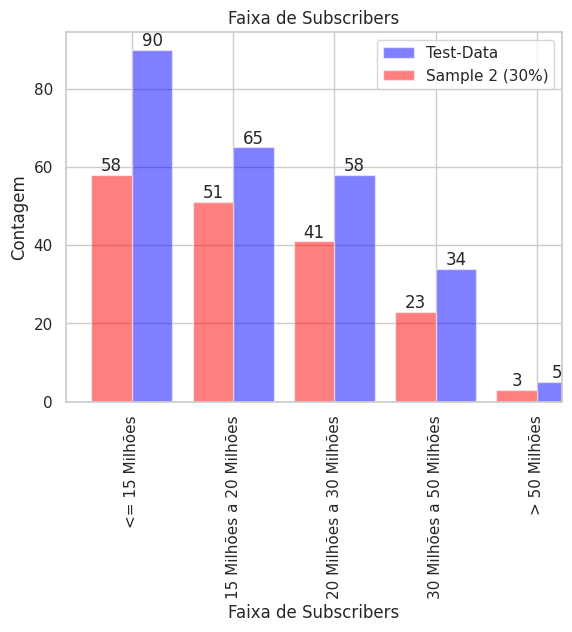

In [193]:
faixas_test_data = [
    (test_data['subscribers'] <= 15_000_000),
    (test_data['subscribers'] > 15_000_000) & (test_data['subscribers'] <= 20_000_000),
    (test_data['subscribers'] > 20_000_000) & (test_data['subscribers'] <= 30_000_000),
    (test_data['subscribers'] > 30_000_000) & (test_data['subscribers'] <= 50_000_000),
    (test_data['subscribers'] > 50_000_000)
]

contagens_test_data = [faixa.sum() for faixa in faixas_test_data]

rotulos_test_data = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_test_data = pd.DataFrame({'Faixa de Subscribers (test_data)': rotulos_test_data, 'Contagem (test_data)': contagens_test_data})

faixas_sample = [
    (sample_data2['subscribers'] <= 15_000_000),
    (sample_data2['subscribers'] > 15_000_000) & (sample_data2['subscribers'] <= 20_000_000),
    (sample_data2['subscribers'] > 20_000_000) & (sample_data2['subscribers'] <= 30_000_000),
    (sample_data2['subscribers'] > 30_000_000) & (sample_data2['subscribers'] <= 50_000_000),
    (sample_data2['subscribers'] > 50_000_000)
]

contagens_sample = [faixa.sum() for faixa in faixas_sample]

rotulos_sample = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_sample = pd.DataFrame({'Faixa de Subscribers (Sample)': rotulos_sample, 'Contagem (Sample)': contagens_sample})

cores_df = ['blue']
cores_sample = ['red']

fig, ax = plt.subplots()

counts_test_data.plot(kind="bar", x='Faixa de Subscribers (test_data)', y='Contagem (test_data)', alpha=0.5, ax=ax, position=0, width=0.4, color=cores_df)
counts_sample.plot(kind="bar", x='Faixa de Subscribers (Sample)', y='Contagem (Sample)', alpha=0.5, ax=ax, position=1, width=0.4, color=cores_sample)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Faixa de Subscribers')
plt.ylabel('Contagem')
plt.xlabel('Faixa de Subscribers')
plt.legend(["Test-Data", "Sample 2 (30%)"])
plt.show()

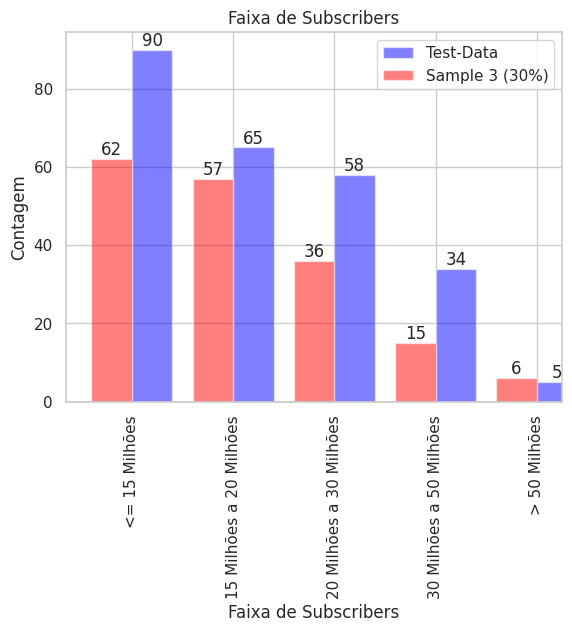

In [194]:
faixas_test_data = [
    (test_data['subscribers'] <= 15_000_000),
    (test_data['subscribers'] > 15_000_000) & (test_data['subscribers'] <= 20_000_000),
    (test_data['subscribers'] > 20_000_000) & (test_data['subscribers'] <= 30_000_000),
    (test_data['subscribers'] > 30_000_000) & (test_data['subscribers'] <= 50_000_000),
    (test_data['subscribers'] > 50_000_000)
]

contagens_test_data = [faixa.sum() for faixa in faixas_test_data]

rotulos_test_data = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_test_data = pd.DataFrame({'Faixa de Subscribers (test_data)': rotulos_test_data, 'Contagem (test_data)': contagens_test_data})

faixas_sample = [
    (sample_data3['subscribers'] <= 15_000_000),
    (sample_data3['subscribers'] > 15_000_000) & (sample_data3['subscribers'] <= 20_000_000),
    (sample_data3['subscribers'] > 20_000_000) & (sample_data3['subscribers'] <= 30_000_000),
    (sample_data3['subscribers'] > 30_000_000) & (sample_data3['subscribers'] <= 50_000_000),
    (sample_data3['subscribers'] > 50_000_000)
]

contagens_sample = [faixa.sum() for faixa in faixas_sample]

rotulos_sample = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_sample = pd.DataFrame({'Faixa de Subscribers (Sample)': rotulos_sample, 'Contagem (Sample)': contagens_sample})

cores_df = ['blue']
cores_sample = ['red']

fig, ax = plt.subplots()

counts_test_data.plot(kind="bar", x='Faixa de Subscribers (test_data)', y='Contagem (test_data)', alpha=0.5, ax=ax, position=0, width=0.4, color=cores_df)
counts_sample.plot(kind="bar", x='Faixa de Subscribers (Sample)', y='Contagem (Sample)', alpha=0.5, ax=ax, position=1, width=0.4, color=cores_sample)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Faixa de Subscribers')
plt.ylabel('Contagem')
plt.xlabel('Faixa de Subscribers')
plt.legend(["Test-Data", "Sample 3 (30%)"])
plt.show()

### Teste de dependencia
Pearson

Hipótese nula (H0) - As duas amostras são dependentes.

Hipótese alternativa (H1) - As duas amostras não são dependentes.

In [195]:
correlation1 = sample_data1['subscribers'].corr(sample_data2['subscribers'], method='pearson')

print("Correlação entre sample_data1 e sample_data2:", correlation1)
if correlation1 > 0.956:
    print("As amostras são provavelmente dependentes")

Correlação entre sample_data1 e sample_data2: 0.9999999999999999
As amostras são provavelmente dependentes


In [196]:
correlation2 = sample_data1['subscribers'].corr(sample_data3['subscribers'], method='pearson')

print("Correlação entre sample_data1 e sample_data2:", correlation2)
if correlation2 > 0.956:
    print("As amostras são provavelmente dependentes")

Correlação entre sample_data1 e sample_data2: 1.0
As amostras são provavelmente dependentes


In [197]:
correlation3 = sample_data2['subscribers'].corr(sample_data3['subscribers'], method='pearson')

print("Correlação entre sample_data1 e sample_data2:", correlation3)
if correlation3 > 0.956:
    print("As amostras são provavelmente dependentes")

Correlação entre sample_data1 e sample_data2: 1.0
As amostras são provavelmente dependentes


#### Desvio

In [198]:
std_sample1 = np.std(sample_data1['subscribers'])
std_sample2 = np.std(sample_data2['subscribers'])
std_sample3 = np.std(sample_data3['subscribers'])
std_test = np.std(test_data['subscribers'])

print(f"Desvio padrão da Sample 1: {std_sample1:.2f}")
print(f"Desvio padrão da Sample 2: {std_sample2:.2f}")
print(f"Desvio padrão da Sample 3: {std_sample3:.2f}")
print(f"Desvio padrão da Test-data: {std_test:.2f}")

Desvio padrão da Sample 1: 9032589.48
Desvio padrão da Sample 2: 9027246.41
Desvio padrão da Sample 3: 9568342.08
Desvio padrão da Test-data: 9614439.61


In [199]:
percentage_std_sample1 = abs((std_test - std_sample1)/std_test)*100
percentage_std_sample2 = abs((std_test - std_sample2)/std_test)*100
percentage_std_sample3 = abs((std_test - std_sample3)/std_test)*100

print(f"Desvio padrão da Sample 1 em relação ao test_data: {percentage_std_sample1:.2f}%")
print(f"Desvio padrão da Sample 2 em relação ao test_data: {percentage_std_sample2:.2f}%")
print(f"Desvio padrão da Sample 3 em relação ao test_data: {percentage_std_sample3:.2f}%")

Desvio padrão da Sample 1 em relação ao test_data: 6.05%
Desvio padrão da Sample 2 em relação ao test_data: 6.11%
Desvio padrão da Sample 3 em relação ao test_data: 0.48%


#### Média

In [200]:
meanDFS = abs(test_data['subscribers'].mean() - sample_data1['subscribers'].mean())
mean_differenceS = abs(test_data['subscribers'].mean() - sample_data1['subscribers'].mean()) / test_data['subscribers'].mean() * 100
print(f"Existe uma diferença de {mean_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {meanDFS :.2f}")

Existe uma diferença de 1.09% na média.
Esses valores equivalem a uma diferença direta de 227029.22


In [201]:
meanDFS = abs(test_data['subscribers'].mean() - sample_data2['subscribers'].mean())
mean_differenceS = abs(test_data['subscribers'].mean() - sample_data2['subscribers'].mean()) / test_data['subscribers'].mean() * 100
print(f"Existe uma diferença de {mean_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {meanDFS :.2f}")

Existe uma diferença de 0.82% na média.
Esses valores equivalem a uma diferença direta de 170779.22


In [202]:
meanDFS = abs(test_data['subscribers'].mean() - sample_data3['subscribers'].mean())
mean_differenceS = abs(test_data['subscribers'].mean() - sample_data3['subscribers'].mean()) / test_data['subscribers'].mean() * 100
print(f"Existe uma diferença de {mean_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {meanDFS :.2f}")

Existe uma diferença de 3.85% na média.
Esses valores equivalem a uma diferença direta de 803733.77


#### Mediana

In [203]:
medianDFS = abs(test_data['subscribers'].median() - sample_data1['subscribers'].median())
median_differenceS = abs(test_data['subscribers'].median() - sample_data1['subscribers'].median()) / test_data['subscribers'].median() * 100
print(f"Existe uma diferença de {median_differenceS:.2f}% na mediana.")
print(f"Esses valores equivalem a uma diferença direta de {medianDFS :.2f}")

Existe uma diferença de 8.08% na mediana.
Esses valores equivalem a uma diferença direta de 1350000.00


In [204]:
medianDFS = abs(test_data['subscribers'].median() - sample_data2['subscribers'].median())
median_differenceS = abs(test_data['subscribers'].median() - sample_data2['subscribers'].median()) / test_data['subscribers'].median() * 100
print(f"Existe uma diferença de {median_differenceS:.2f}% na mediana.")
print(f"Esses valores equivalem a uma diferença direta de {medianDFS :.2f}")

Existe uma diferença de 5.69% na mediana.
Esses valores equivalem a uma diferença direta de 950000.00


In [205]:
medianDFS = abs(test_data['subscribers'].median() - sample_data3['subscribers'].median())
median_differenceS = abs(test_data['subscribers'].median() - sample_data3['subscribers'].median()) / test_data['subscribers'].median() * 100
print(f"Existe uma diferença de {median_differenceS:.2f}% na mediana.")
print(f"Esses valores equivalem a uma diferença direta de {medianDFS :.2f}")

Existe uma diferença de 1.50% na mediana.
Esses valores equivalem a uma diferença direta de 250000.00


#### Boxplot

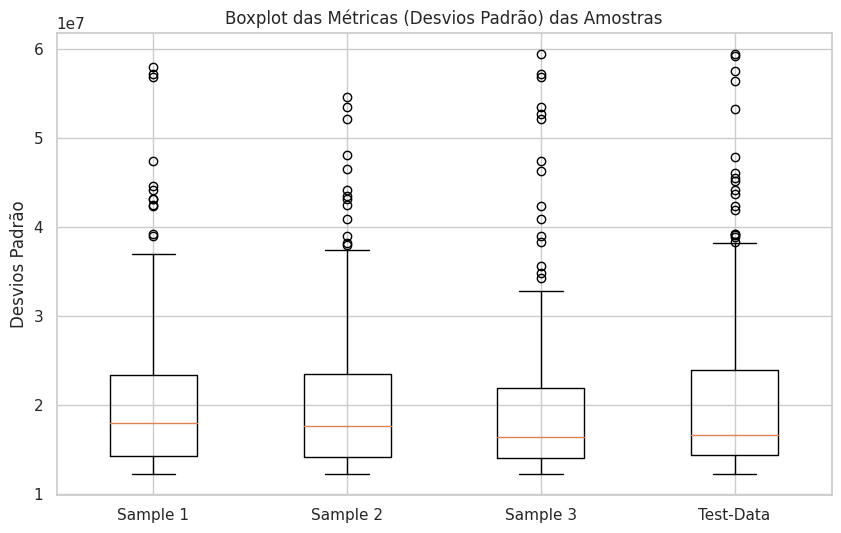

In [206]:
labels = ['Sample 1', 'Sample 2', 'Sample 3', 'Test-Data']

plt.figure(figsize=(10, 6))
plt.boxplot([sample_data1['subscribers'], sample_data2['subscribers'], sample_data3['subscribers'], test_data['subscribers']], labels=labels)
plt.title("Boxplot das Métricas (Desvios Padrão) das Amostras")
plt.ylabel("Desvios Padrão")
plt.show()

### Conclusão

Não ouve uma diferença significante nos dados apresentados. Assim, sendo possivel inferir que com base nos graficos e nas metricas representadas, existem evidencias que levam a supor que as amostras tendem a representar de maneira coesa o dataset.

Sendo possível identificar uma alta concentração de canais entre os 10 e 30 milhões de inscritos, assim apontando um possível fenômeno a ser estudado.

E um padrão de distribuição exponencial na coluna subscribers do dataset.
